Relatório do Projeto Final de Introdução à Ciência dos Dados

# Introdução

O eterno embate entre popularidade e qualidade de um produto midiático sempre foi um tópico de interesse daqueles que o consomem. Todos gostariam que aquele produto que tanto admiram seja considerado de qualidade, afinal ninguém gosta de ouvir que uma obra adorada é ruim. Porém, muitas obras independem da opinião de um especialista para ganharem o coração do público. Os Video Games não fogem dessa situação. Enquanto jogos avaliados por críticos especialistas como obras primas costumam fazer sucesso, existem também os que são considerados medíocres e mesmo assim vendem milhões pelo mundo.

Para analisar melhor essa relação, encontramos uma base de dados sobre Video Games que venderam pelo menos 100 000 cópias de 1980 a 2016, gerada a partir do site [VGChartz](http://www.vgchartz.com/). Além de incluir os nomes dos jogos, a base de dados apresenta a plataforma para que o jogo foi lançado, o ano em que foi lançado, o gênero do jogo, a empresa que o publicou, o desenvolvedor, a classificação indicativa e por fim, as vendas separadas por região, além das vendas globais e as avaliações de críticos e usuários que jogaram o jogo, além de sua quantidade.

A partir desses dados pretendemos analisar, principalmente, a relação entre as avaliações dos críticos e as vendas dos jogos, mas também as relações entre gênero e classificação indicativa e entre o desenvolvedor e o número de jogadores.

# Metodologia

# Resultados

# Caracterização

Maior número de vendas implica em maior qualidade?

Qual a relação entre gênero e classificação indicativa?

O desenvolvedor do jogo influencia na quantidade de jogadores?

In [2]:
import pandas as pd

df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


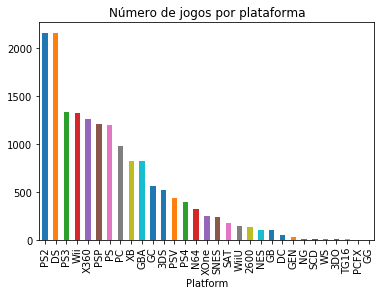

In [9]:
import matplotlib.pyplot as plt

df1 = df.copy()
df1 = df1.groupby(['Platform']).count()
df1 = df1['Name']
df1 = df1.sort_values(ascending=False)
plt.title('Número de jogos por plataforma')
df1.plot.bar()

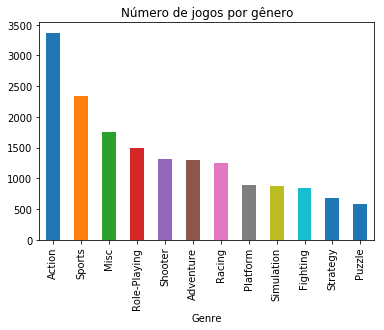

In [4]:
df1 = df.copy()
df1 = df1.groupby(['Genre']).count()
df1 = df1['Name']
df1 = df1.sort_values(ascending=False)
plt.title('Número de jogos por gênero')
df1.plot.bar()

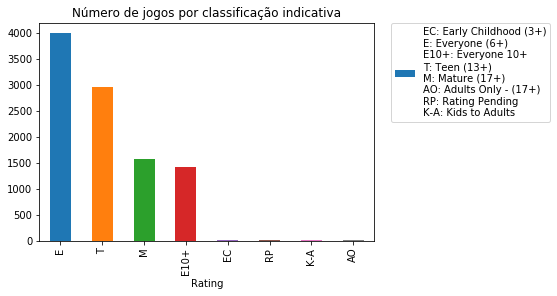

In [18]:
df1 = df.copy()
df1 = df1.groupby(['Rating']).count()
df1 = df1['Name']
df1 = df1.sort_values(ascending=False)
plt.title('Número de jogos por classificação indicativa')
df1.plot.bar(label='EC: Early Childhood (3+)\nE: Everyone (6+)\nE10+: Everyone 10+\nT: Teen (13+)\nM: Mature (17+)\nAO: Adults Only - (17+)\nRP: Rating Pending\nK-A: Kids to Adults')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

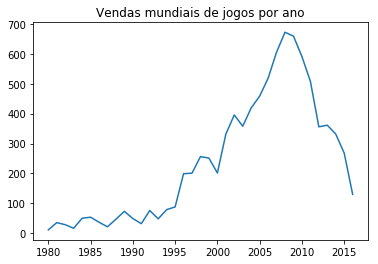

In [6]:
df1 = df.copy()
d = ['Year_of_Release', 'Global_Sales']
df1 = df1[d]
df1 = df1.groupby('Year_of_Release').sum()
df1 = df1.drop([2017.0, 2020.0])
plt.title('Vendas mundiais de jogos por ano')
plt.plot(df1)

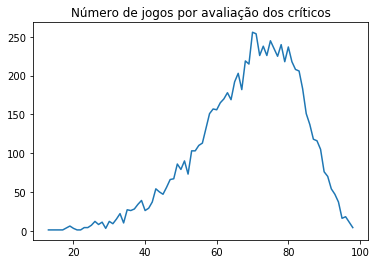

In [7]:
df1 = df.copy()
df1 = df1.groupby(['Critic_Score']).count()
df1 = df1['Name']
df1
plt.title('Número de jogos por avaliação dos críticos')
plt.plot(df1)

# Previsão

Maior número de vendas implica em maior qualidade?

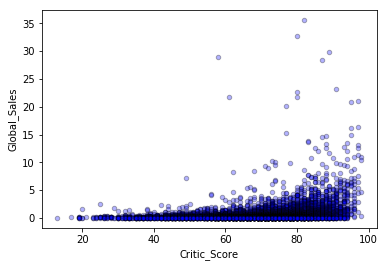

In [125]:
from sklearn.linear_model import LinearRegression
import numpy as np

new_df = df.copy()
new_df = new_df.drop([0]) #Wii sports tava bugando as vendas pq ele vem com o wii
new_df = new_df.dropna()

new_df.plot.scatter(x='Critic_Score', y='Global_Sales', color='blue', alpha=0.3, edgecolor='k')

In [101]:
from sklearn.model_selection import train_test_split

X = new_df['Critic_Score'].values
y = new_df['Global_Sales'].values
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [102]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: ', model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, prediction))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, prediction))

Coefficients:  [0.03250808]
Mean squared error: 2.73
Variance score: 0.08


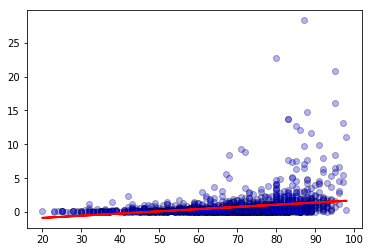

In [127]:
# Plot outputs
plt.scatter(X_test, y_test,  color='blue', alpha=0.3, edgecolor='k')
plt.plot(X_test, prediction, color='red', linewidth=2)

plt.show()

Hipótese nula: qualidade não influencia nas vendas (chance igual de vender sendo o jogo bom ou não)

In [124]:
from sklearn.model_selection import permutation_test_score

score, permutation_scores, pvalue = permutation_test_score(model, X_test, prediction, cv=3)
print("Classification score %s (pvalue : %s)" % (score, pvalue))

Classification score 1.0 (pvalue : 0.009900990099009901)
